Mejores hiperparámetros: {'alpha': 0.001, 'max_iter': 500, 'penalty': None}
Mejor puntuación de validación cruzada: 0.67
----------------------------
Puntaje de entrenamiento: 0.90
Puntaje de validación: 0.89
Puntaje de prueba: 0.90
----------------------------
Puntaje de TPR: 0.81
Puntaje de TNR: 0.99
Puntaje de FPR: 0.01
Puntaje de FNR: 0.19
Puntaje de F1: 0.89
Puntaje de Precisión: 0.99
Puntaje de Exactitud: 0.90
Puntaje de Sesgo Ratio: 0.31


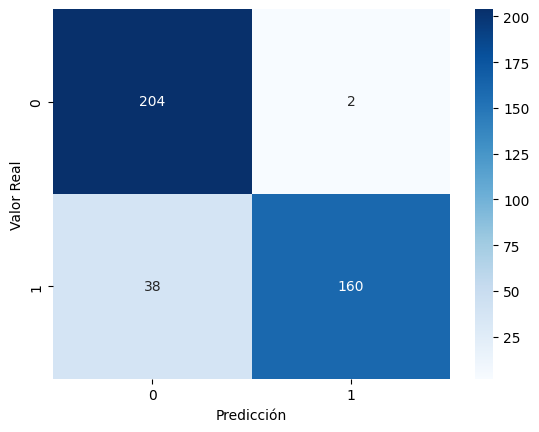

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import Perceptron

# Leemos el dataset
data = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")

# Limpieza del dataset
data.drop('song_title', inplace=True, axis=1)
data.drop('artist', inplace=True, axis=1)

X = data.drop('target', axis=1)
y = data.target

rs = 42

# Dividimos los datos en conjuntos de entrenamiento, validación y prueba (60-20-20)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

# Definimos los valores de hiperparámetros que queremos probar
param_grid = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.001, 0.01, 0.1, 1],
    'max_iter': [500, 1000, 5000]
}

# Creamos el modelo
clf = Perceptron(random_state=rs)

# Hacemos grid-search de hiperparámetros con k-fold-validation para elegir los mejores
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid_search.best_params_}")
print(f"Mejor puntuación de validación cruzada: {grid_search.best_score_:.2f}")
print("----------------------------")

# Entrenamos el modelo con los mejores hiperparámetros encontrados
clf = Perceptron(**grid_search.best_params_)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluamos el rendimiento de los 3 conjuntos (entrenamineto, validación y prueba)
train_score = clf.score(X_train, y_train)
val_score = clf.score(X_val, y_val)
test_score = clf.score(X_test, y_test)

print(f"Puntaje de entrenamiento: {train_score:.2f}")
print(f"Puntaje de validación: {val_score:.2f}")
print(f"Puntaje de prueba: {test_score:.2f}")
print("----------------------------")

# Calculamos los parametros de calidad
tpr = recall_score(y_test, y_pred, pos_label=1)
tnr = recall_score(y_test, y_pred, pos_label=0)
fpr = 1 - recall_score(y_test, y_pred, pos_label=0)
fnr = 1 - recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=1)
accuracy = accuracy_score(y_test, y_pred)
sesgo_ratio = (tpr+fnr)/(tnr+fpr) - (tpr+fpr)/(tnr+fnr)

print(f"Puntaje de TPR: {tpr:.2f}")
print(f"Puntaje de TNR: {tnr:.2f}")
print(f"Puntaje de FPR: {fpr:.2f}")
print(f"Puntaje de FNR: {fnr:.2f}")
print(f"Puntaje de F1: {f1:.2f}")
print(f"Puntaje de Precisión: {precision:.2f}")
print(f"Puntaje de Exactitud: {accuracy:.2f}")
print(f"Puntaje de Sesgo Ratio: {sesgo_ratio:.2f}")

# Calculamos la matriz de contingencia
cm = confusion_matrix(y_test, y_pred)
class_names = np.unique(y_test)

# Generamos el heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()
